# Example No 4 :  DNN model by Keras for Regression model 

### What is the new we will learn in this example ?
- We will build regression model not classification! 
- As a results, we will focus on the differences between regression and classification in Keras.  
- In addition, we will try one of the tools of Keras, Early Stopping during training, to avoid running many epochs without any detectable improvements in the model.

### What are the basic steps to build our NN model ?
> The same life cycle for any NN model as we mentioned in the previous tutorial. 
1. Load Data
2. Scaling data 
3. Define Keras Model
4. Compile Keras Model
5. Fit Keras Model
6. Evaluate Keras Model
7. Make Predictions

### 1. Load Data

In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

> **Notes about the dataset**
- The dataset used here, auto-mpg.data, well-known dataset commonly used for regression tasks, particularly for predicting the fuel efficiency (miles per gallon, or mpg) of various car models based on certain features.
- Let's read the dataframe and see what we can do with as a preparation for our model

In [2]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv('auto-mpg.data', names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


> **Modify the shape of data**
- In the dataset, the "origin" column designates the country of origin, where 1 corresponds to the USA, 2 to Europe, and 3 to Japan. It is recommended to split this information into three separate columns— one for the USA, another for Europe, and a third for Japan— as outlined below.

In [3]:
dataset.isna().sum()
dataset = dataset.dropna()
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


- Again, We will divide our data into training and testing sets
- And plot relations between the different columns to understand the relations between these items  by seaborn module.

/Users/marzouk/miniconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


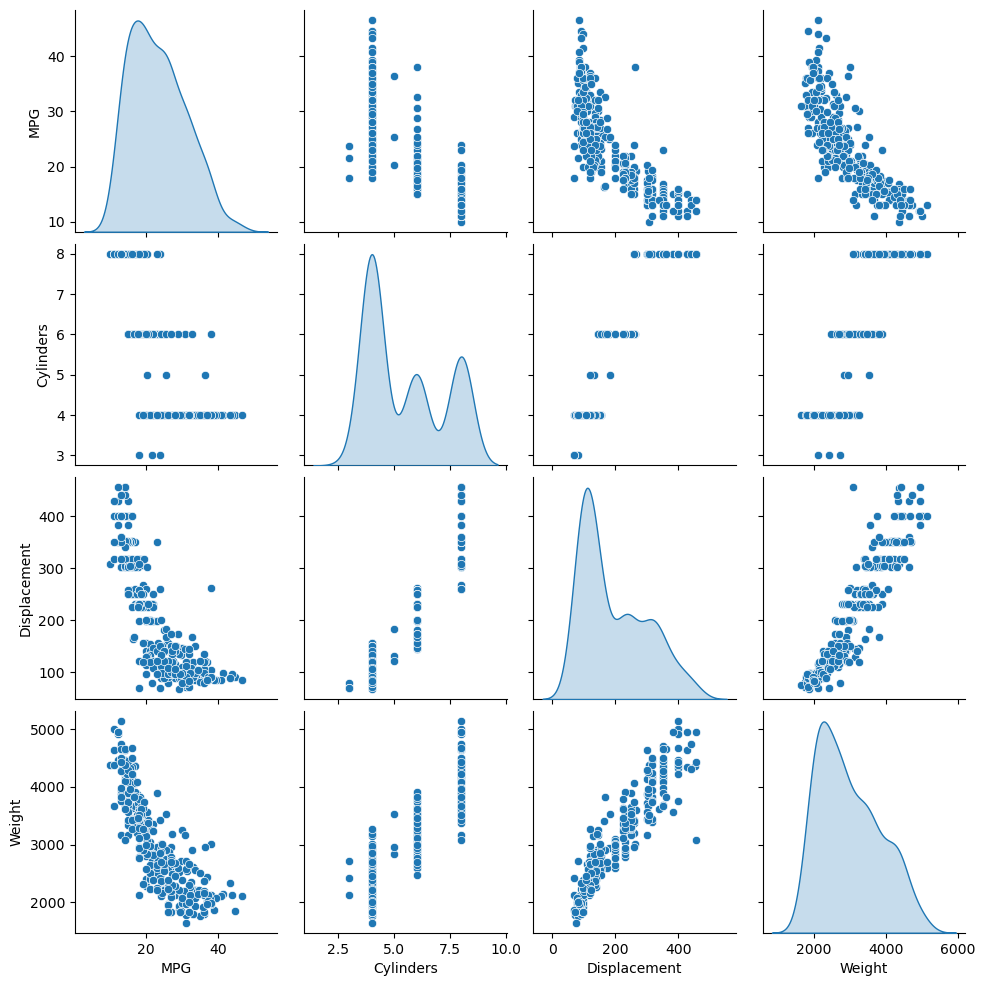

In [7]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

In [8]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### 2. Scaling data 


In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

### 3. Define Keras Model
### 4. Compile Keras Model


> Important notes about the differences between building model by Keras for Classification or Regression 
* NO Flatten layer --> Because the input data already structured. 
And as we said earlier the Flatten layer is commonly used in image classification tasks where the input data is often a 2D array representing an image, so we need to Flatten it to 1D input layer
* The output layer, only 1 output (Dense(1)) --> Because in regression only one output (the predicted value), while in classification we had 2 outputs (binary classification) or more (multi classification) 
* metics is "mean_squared_error"  not Accuracy 


In [10]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.legacy.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


> To Follow Up the progress : Display training progress by printing a single dot for each completed epoch

In [13]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

### 5. Fit Keras Model


- Now, the model will train on the data and for each epoch add 1 dot  

In [14]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

> Save the history of the model during training

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.268542,0.932199,2.268542,9.304996,2.325721,9.304996,995
996,2.177505,0.914854,2.177505,9.605288,2.354253,9.605288,996
997,2.208317,0.932123,2.208317,10.428085,2.493681,10.428085,997
998,2.324602,0.948523,2.324602,9.299874,2.302293,9.299874,998
999,2.087920,0.886075,2.087920,9.345207,2.296563,9.345207,999


> Plot the relation between the epoch no Vs the error to follow up the model learning performance from the training data.

In [17]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

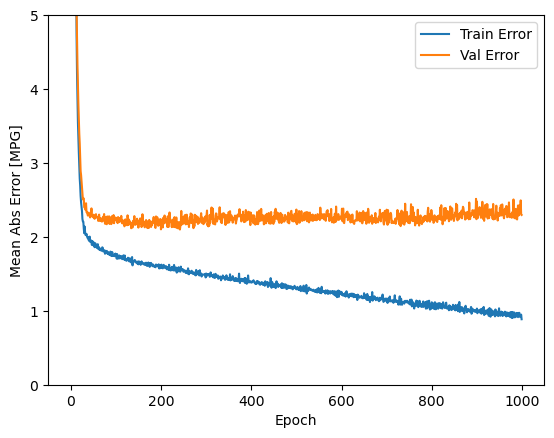

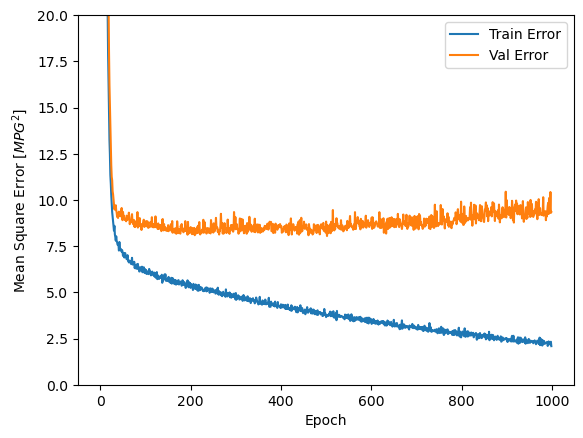

In [18]:
plot_history(history)

> Observation : 
* After around 150 epochs almost the error saturated, so no need to use more epochs.

> However, we want to learn the model to stop automatically, at certain point. How ?

- We will build the model and fit it again!!

In [26]:
model = build_model()

                                    " Early Stopping during training "

* Early Stopping during training 
    * There is a callback class provided by Keras for early stopping during training "keras.callbacks.EarlyStopping"
    * In this class there are two important parameters: 
        *  monitor='val_loss' : It specifies the metric that the callback should monitor to decide whether to stop the training.  In this case, it's monitoring the validation loss, which is commonly used. The training process will halt if the validation loss stops improving.
        * patience=10 : The number of epochs with no improvement in the monitored metric (validation loss, in this case) after which training will be stopped. In this example, if the validation loss does not improve for 10 consecutive epochs, the training will stop early.
    * Consider the early stopping option as a precautionary measure where you instruct the model to halt training before it reaches the point of overfitting.

In [19]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

- Let's see the effect of early stop on the epochs numbers

In [20]:
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


..................

> Plot the history again, to see if the model stop earlier 

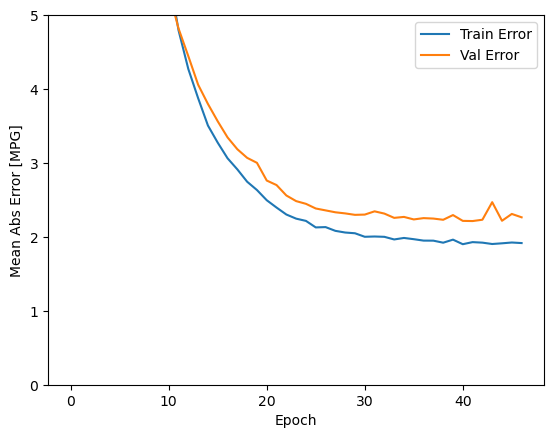

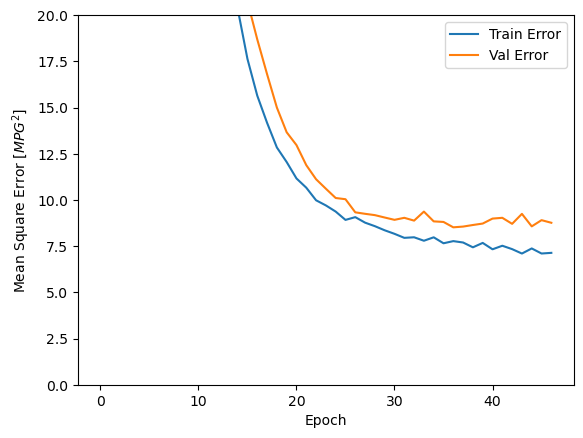

In [29]:
plot_history(history)

> Observation 
- It has already stopped after approximately 50 epochs because there is no need to continue running additional epochs when there are no improvements.

### 6. Evaluate Keras Model


In [24]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print('The loss of our model on test dataset : %.2f' % (loss))
print('The Mean Abs Error of our model on test dataset : %.2f' % (mae))
print('The Mean Squared Error of our model on test dataset : %.2f' % (mse))

The loss of our model on test dataset : 7.46
The Mean Abs Error of our model on test dataset : 2.22
The Mean Squared Error of our model on test dataset : 7.46


### 7. Make Predictions

> Executing the prediction function once over the entire dataset.

In [26]:
test_predictions = model.predict(normed_test_data).flatten()

3/3 [==============================] - 0s 947us/step


> Visualize the predicted and actual values on a single graph.

(0.0, 45.64445574760437)

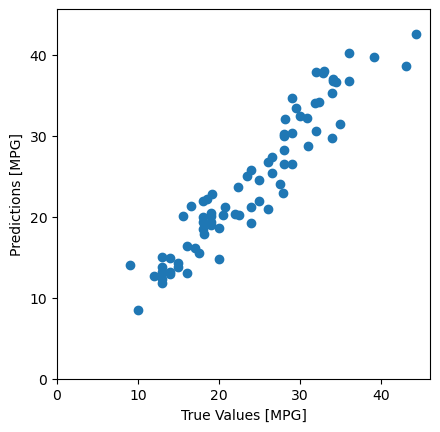

In [27]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

In [32]:
print("The first 5 labels in the test data", test_labels[0:5])
print("-------------------------------------------------------")
print("The first 5 output of the predicted data", test_predictions[0:5])


The first 5 labels in the test data 9     15.0
25    10.0
28     9.0
31    25.0
33    19.0
Name: MPG, dtype: float64
-------------------------------------------------------
The first 5 output of the predicted data [13.768883  8.514586 13.987203 24.52058  20.128672]


&nbsp;

### For Keras basic tools & other examples
--------------------------------------
[Keras Basic Tools for DNN](../1_Keras_BasicTools_DNN.ipynb)

[Case Study No 1](Keras_CaseStudy_no1.ipynb) : To understand how to apply rescaling to data.

[Case Study No 2](Keras_CaseStudy_no2.ipynb) : To observe the impact of increasing the number of hidden layers on the model's accuracy.

[Case Study No 3](Keras_CaseStudy_no3.ipynb) : For image classification tasks involving fashion items, a challenging dataset is employed. 

[Case Study No 5](Keras_CaseStudy_no5.ipynb) : Dogs & Cats classifications to assess whether DNN  can effectively handle the image data or not! 

&nbsp;

### Refrences
--------------------------
- <a rel="keras_website" href="https://keras.io"> Keras Official Website. </a>
- <a rel="the code used" href="https://www.youtube.com/watch?v=ohyn_MzS_hE&list=PL6-3IRz2XF5VbuU2T0gS_mFhCpKmLxvCP"> Playlist for Keras in Arabic by Hesham Asem. </a>
- <a rel="the code used2" href="https://github.com/HeshamAsem?tab=repositories"> Hesham Asem GitHub for ML tools. </a>
- <a rel="article read" href="https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/"> Use Early Stopping to Halt the Training of Neural Networks At the Right Time, Machine Learning Mastery. </a>